## Chart Samples

In [10]:
# Required settings and libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30)

# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

### Histograms

In [4]:
#utility functions

def histogram_style():
    remove_border(left=False)
    plt.grid(False)
    plt.grid(axis='y', color='w', linestyle='-', lw=1)

In [5]:
# import data
critics = pd.read_csv('critics.csv') # Rotten Tomatoes Top Critics Reviews Data for about 3000 movies

# clean data
critics = critics[~critics.quote.isnull()]
critics = critics[critics.fresh.notnull()]
critics = critics[critics.quote.str.len() > 0]
critics = critics.reset_index(drop = True)
critics.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title
0,Amy Nicholson,fresh,114709.0,Boxoffice Magazine,I think I speak for all adults and kids when I...,"October 5, 2009",toy_story,Toy story
1,Derek Adams,fresh,114709.0,Time Out,"So ingenious in concept, design and execution ...","October 4, 2009",toy_story,Toy story
2,Richard Corliss,fresh,114709.0,TIME Magazine,The year's most inventive comedy.,"August 31, 2008",toy_story,Toy story
3,David Ansen,fresh,114709.0,Newsweek,A winning animated feature that has something ...,"August 18, 2008",toy_story,Toy story
4,Leonard Klady,fresh,114709.0,Variety,The film sports a provocative and appealing st...,"June 9, 2008",toy_story,Toy story


What does the distribution of number of reviews per reviewer look like? 

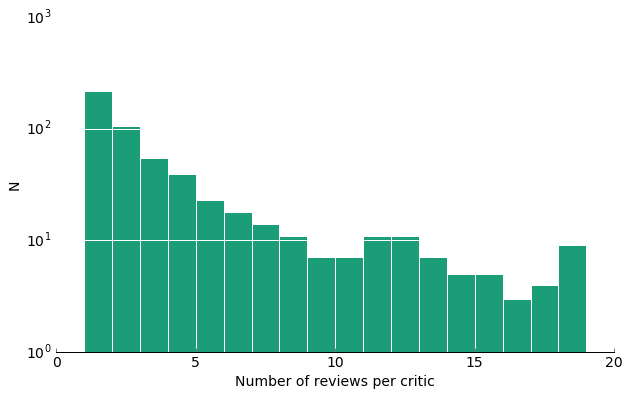

In [7]:
plt.hist(critics.groupby('critic').rtid.count(),log = True, bins=range(20), edgecolor='white')
plt.xlabel("Number of reviews per critic")
plt.ylabel("N")
histogram_style()

Of the critics with > 100 reviews, plot the distribution of average "freshness" rating per critic

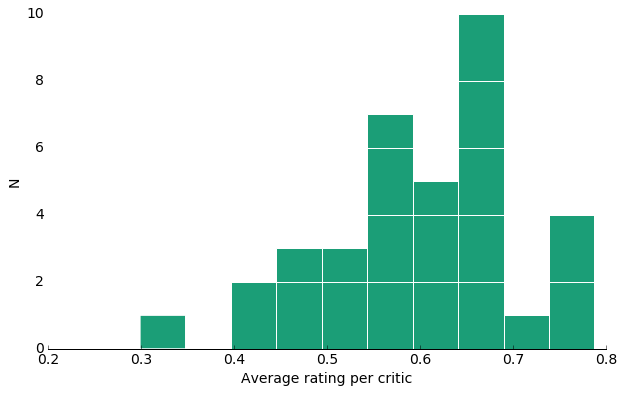

In [8]:
df = critics.copy()
df['fresh'] = df.fresh == 'fresh'

grp = df.groupby('critic')
counts = grp.rtid.count()
means = grp.fresh.mean()
means[counts > 100].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average rating per critic")
plt.ylabel("N")
plt.yticks([0, 2, 4, 6, 8, 10])
histogram_style()

Using the original movies dataframe, plot the rotten tomatoes Top Critics Rating as a function of year. Overplot the average for each year, ignoring the score=0 examples (some of these are missing data).

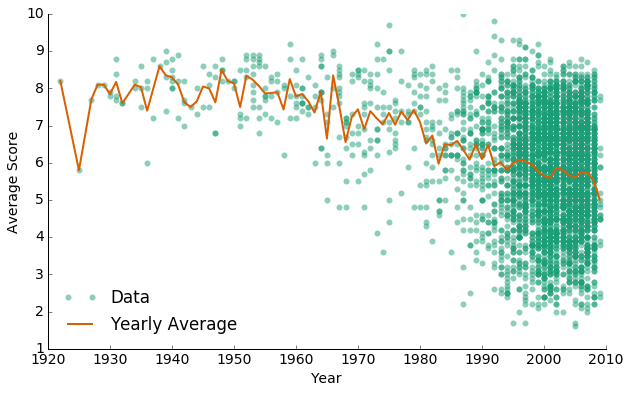

In [11]:
# Get the data
from io import StringIO  
movie_txt = requests.get('https://raw.github.com/cs109/cs109_data/master/movies.dat').text
movie_file = StringIO(movie_txt) # treat a string like a file
movies = pd.read_csv(movie_file, delimiter='\t')
movies = movies.dropna()
movies = movies.reset_index(drop = True)

# process data
data = movies[['year','rtTopCriticsRating']]
#data = data.convert_objects(convert_numeric=True) #deprecated
data = data.apply(pd.to_numeric)
data = data[(data.rtTopCriticsRating > 0.00)]
means  = data.groupby('year').mean()

# plotting
plt.plot(data['year'], data['rtTopCriticsRating'], 'o', mec = 'none', alpha = .5, label = 'Data' )
plt.plot(means.index, means['rtTopCriticsRating'], '-',  label = 'Yearly Average' )
plt.legend(loc ='lower left', frameon = False)
plt.xlabel("Year")
plt.ylabel("Average Score")
remove_border()

This graph shows a trend towards a lower average score, as well as a greater abundance of low scores, with time. This is probably at least partially a selection effect -- Rotten Tomatoes probably doesn't archive reviews for all movies, especially ones that came out before the website existed. Thus, reviews of old movies are more often "the classics". Mediocre old movies have been partially forgotten, and are underrepresented in the data. Other questions worth exploring:
Does the down trend mean:
* the quality of movies has dropped ?
* the top critics became more stringent in giving higher ratings?
* more top critics with stringent ratings entered the scene?
